In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

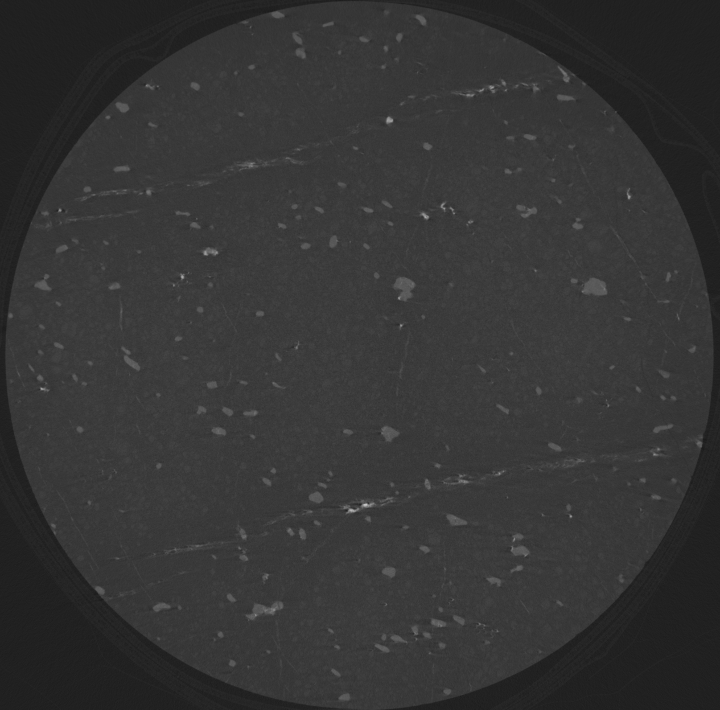

In [2]:
# Load the grayscale PNG images
images_path = './X-Ray CT - Ramyar/1A-135k-Data/'
import os
images = os.listdir(images_path)
images = [i for i in images if i.endswith('.png')]
images = [images_path + i for i in images]

def load_preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale (L mode)
    # Crop the image to the region of interest
    image = image.crop((280, 110, 1000, 820))
    return image

image = load_preprocess_image(images[1])
image

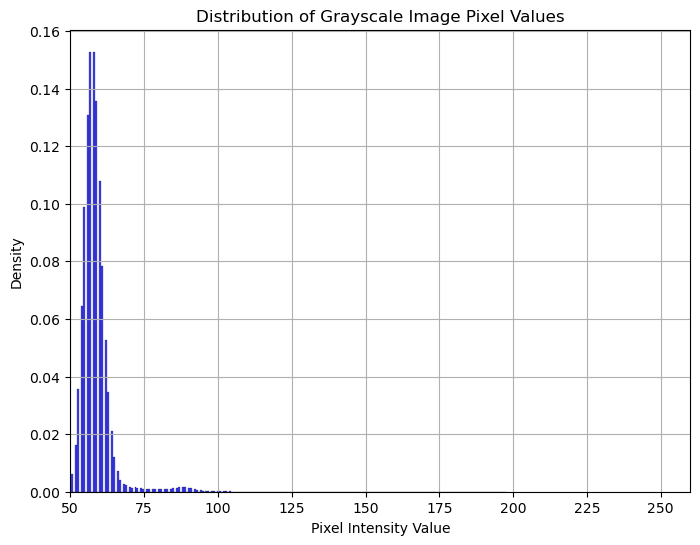

In [3]:
# Convert the image to a NumPy array
image_array = np.array(image)

# Flatten the image array for the box plot
flattened_pixels = image_array.flatten()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(flattened_pixels, bins=256, color='blue', stat="density")
plt.title("Distribution of Grayscale Image Pixel Values")
plt.xlabel("Pixel Intensity Value")
plt.ylabel("Density")
# plt.ylim(0, 0.014)  # Set the x-axis range
plt.xlim(50, 260)
plt.grid(True)
plt.show()

In [4]:
image_array = np.array(image)
image_array.shape

(710, 720)

In [8]:
# Define a threshold
threshold = 75  

for image_path in images:
    # Load and preprocess the image
    image = load_preprocess_image(image_path)
    
    # Convert the image to a NumPy array
    image_array = np.array(image)
    
    # Create an RGB version of the image
    rgb_image_array = np.stack([image_array]*3, axis=-1) 
    
    # Change pixels above the threshold to red
    rgb_image_array[image_array > threshold] = [255, 0, 0] 
    
    # Convert back to an image for display
    modified_image = Image.fromarray(rgb_image_array.astype('uint8'))
    
    # Display the original and modified images
    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    # Modified image
    plt.subplot(1, 2, 2)
    plt.imshow(modified_image)
    plt.title("Modified Image (Red Pixels)")
    plt.axis('off')
    
    plt.tight_layout()
    # save the plot in new directory with the same name as the image
    plot_output_path = 'modified_images_threshold/' + image_path.split('/')[-1].replace('.png', '_modified.png')
    plt.savefig(plot_output_path) 
    plt.close()




In [17]:
import cv2
from sklearn.cluster import KMeans


for image_path in images:
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Crop the image to the region of interest
    image = image[110:820, 280:1000]
    
    # Reshape the image data for clustering
    pixels = image.reshape(-1, 1)
    
    # Apply KMeans clustering to identify light spots
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.labels_.reshape(image.shape)
    
    # Determine which cluster corresponds to the light spots (higher intensity)
    cluster_centers = kmeans.cluster_centers_.flatten()
    light_spot_cluster = np.argmax(cluster_centers)
    
    # Create a binary mask for light spots
    thresholded = np.uint8(labels == light_spot_cluster) * 255
    
    # Convert grayscale image to BGR for coloring
    image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Change the color of light spots to red
    image_colored[thresholded == 255] = [0, 0, 255]
    
    # Display the original and processed images
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Processed Image')
    plt.imshow(cv2.cvtColor(image_colored, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.tight_layout()
    # save the plot in new directory with the same name as the image
    plot_output_path = 'processed_images_kmeans/' + image_path.split('/')[-1].replace('.png', '_processed.png')
    plt.savefig(plot_output_path)
    plt.close()


In [11]:
labels.shape

(933, 1294)

In [12]:
cluster_centers

array([5.91619286e+01, 9.79332899e-04, 3.30284578e+01])